<h1>Introduction</h1>
<p> In this project, I use Naïve Bayes to implement a spam filter. I use the dataset <b><i>spam.csv</i></b> to train and test the model. </p> 
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam.</p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet). Therefore, in this project I do not use the scikit-learn library or similar libraries that perform similar tasks in order to better understand implementation details. </p>

<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set. The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>1.  Read the dataset into a dataframe and exploration</h3>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv('spam.csv')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>I am only interested in words so I clean the data such that all punctuations are removed.  I am left with a dataset that only contains alpha characters (including spaces).  I also ensured all the words are lowercase.</p>

In [22]:
clean = df
clean = clean.rename(columns = {"v1":"Category", "v2":"Message"})
clean = clean.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [23]:
clean['Message'] = clean['Message'].str.lower()
clean['Message'] = clean['Message'].str.replace(r'[^\w\s]+', '', regex=True)
clean['Message'] = clean['Message'].str.replace('\d+', '', regex=True)
clean['Message'] = clean['Message'].str.replace('_', '')
clean

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ã b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>
<p>I split the data into two random samples, one for training the model and the other for testing the model.</p>

In [24]:
train_data = clean.iloc[:4179]
train_data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
4174,ham,how are you doing hows the queen are you going...
4175,ham,hes in lag thats just the sad part but we keep...
4176,ham,ok lor then we go tog lor
4177,ham,two teams waiting for some players


In [25]:
test_data = clean.iloc[4179:]
test_data

,Category,Message
4179,ham,swhrt how u deyhope ur ok tot about u daylove ...
4180,ham,ok da i already planned i wil pick you
4181,spam,urgent please call your abta complimentary s...
4182,ham,sorry ill call later in meeting
4183,ham,i just really need shit before tomorrow and i ...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ã b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>4. Create a Word Frequency DataFrame</h3>
<p>I create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message (using only the training data). </p>

In [26]:
train_data_spam = train_data[train_data['Category'] == 'spam']
train_data_ham = train_data[train_data['Category'] == 'ham']
display(train_data_spam)
display(train_data_ham)

,Category,Message
2,spam,free entry in a wkly comp to win fa cup final...
5,spam,freemsg hey there darling its been weeks now ...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...
11,spam,six chances to win cash from to pounds txt c...
...,...,...
4152,spam,urgent your costa del sol holiday or â await ...
4154,spam,want a new video phone anytime any network mi...
4160,spam,had your mobile months or more u r entitled t...
4164,spam,dear voucher holder to claim this weeks offer ...


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
6,ham,even my brother is not like to speak with me t...
...,...,...
4174,ham,how are you doing hows the queen are you going...
4175,ham,hes in lag thats just the sad part but we keep...
4176,ham,ok lor then we go tog lor
4177,ham,two teams waiting for some players


In [27]:
train_data_spam_series = train_data_spam.Message.str.split(expand=True).stack().value_counts()
train_data_spam_series.name = "#Spam"
train_data_spam_series

to                     529
a                      283
call                   263
you                    213
â                      203
                      ... 
jst                      1
cam                      1
pictxt                   1
msgp                     1
httpwwwwtlpcouktext      1
Name: #Spam, Length: 1990, dtype: int64

In [28]:
train_data_ham_series = train_data_ham.Message.str.split(expand=True).stack().value_counts()
train_data_ham_series.name = "#Ham"
train_data_ham_series

i               1636
you             1418
to              1161
the              839
a                801
                ... 
glasgow            1
kall               1
bestcongrats       1
lovin              1
teams              1
Name: #Ham, Length: 6264, dtype: int64

In [29]:
word_freq = pd.concat([train_data_spam_series, train_data_ham_series], axis = 1).reset_index()
word_freq = word_freq.rename(columns = {"index":"Word"})
word_freq = word_freq.fillna(0)
word_freq["#Spam"] = word_freq["#Spam"].astype(int)
word_freq["#Ham"] = word_freq["#Ham"].astype(int)
word_freq

,Word,#Spam,#Ham
0,to,529,1161
1,a,283,801
2,call,263,174
3,you,213,1418
4,â,203,27
...,...,...,...
7348,glasgow,0,1
7349,kall,0,1
7350,bestcongrats,0,1
7351,lovin,0,1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

In [30]:
train_data_spam_dictionary = train_data_spam_series.to_dict()
train_data_spam_dictionary

{'to': 529,
 'a': 283,
 'call': 263,
 'you': 213,
 'â': 203,
 'your': 187,
 'free': 169,
 'the': 153,
 'now': 151,
 'for': 147,
 'or': 138,
 'u': 127,
 'is': 119,
 'txt': 119,
 'on': 113,
 'ur': 112,
 'and': 104,
 'have': 102,
 'from': 95,
 'text': 90,
 'claim': 86,
 'mobile': 85,
 'stop': 81,
 'reply': 79,
 'with': 79,
 'of': 76,
 'prize': 73,
 'are': 64,
 'only': 64,
 'just': 63,
 'get': 62,
 'our': 61,
 'this': 61,
 'in': 58,
 'won': 56,
 'p': 55,
 'new': 54,
 'nokia': 54,
 'no': 51,
 'win': 49,
 'send': 49,
 'cash': 46,
 'urgent': 46,
 'out': 43,
 'please': 43,
 'service': 43,
 'who': 41,
 'contact': 41,
 'we': 40,
 'i': 39,
 'be': 39,
 'per': 39,
 'week': 38,
 'customer': 38,
 'guaranteed': 38,
 'chat': 37,
 'ppm': 36,
 'phone': 36,
 'tone': 36,
 'will': 35,
 'box': 34,
 'been': 32,
 'by': 29,
 'draw': 29,
 'awarded': 28,
 'mins': 27,
 'every': 27,
 'line': 27,
 'as': 26,
 'live': 25,
 'more': 25,
 'message': 24,
 'go': 24,
 'landline': 24,
 'not': 24,
 'camera': 24,
 'st': 24,
 '

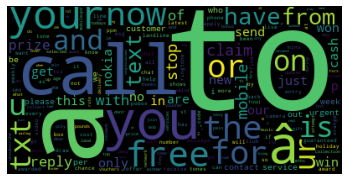

In [31]:
wordcloud = WordCloud().generate_from_frequencies(train_data_spam_dictionary)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>To calculate the probability of a word being spam I divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message, I divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>

In [32]:
word_prob = word_freq
k = 0.5
total_spam = 565 + (2 * k)
total_ham = 3614 + k
print(total_spam)
print(total_ham)

word_prob['P(E|S)'] = word_prob.apply(lambda row: (row["#Spam"] + 0.5)/total_spam, axis=1)
word_prob['P(E|¬S)'] = word_prob.apply(lambda row: (row["#Ham"] + 0.5)/total_ham, axis=1)
word_prob = word_prob.drop(columns=['#Spam', '#Ham'])
display(word_prob)

566.0
3614.5


,Word,P(E|S),P(E|¬S)
0,to,0.935512,0.321345
1,a,0.500883,0.221746
2,call,0.465548,0.048278
3,you,0.377208,0.392447
4,â,0.359541,0.007608
...,...,...,...
7348,glasgow,0.000883,0.000415
7349,kall,0.000883,0.000415
7350,bestcongrats,0.000883,0.000415
7351,lovin,0.000883,0.000415


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

In [33]:
prior_spam = 0.4
prior_ham = 0.6
prob_s_given_e_to = (word_prob['P(E|S)'][0] * prior_spam) / ((word_prob['P(E|S)'][0] * prior_spam) + (word_prob['P(E|¬S)'][0] * prior_ham))
prob_nots_given_e_to = (word_prob['P(E|¬S)'][0] * prior_spam) / ((word_prob['P(E|S)'][0] * prior_spam) + (word_prob['P(E|¬S)'][0] * prior_ham))

print("Word = ['" + word_prob['Word'][0] + "']")
print("P(E|S) = " + str(word_prob['P(E|S)'][0]))
print("P(E|¬S) = " + str(word_prob['P(E|¬S)'][0]))
print("P(S|E) = " + str(prob_s_given_e_to))
print("P(¬S|E) = " + str(prob_nots_given_e_to))

Word = ['to']
P(E|S) = 0.9355123674911661
P(E|¬S) = 0.321344584313183
P(S|E) = 0.6599598360857124
P(¬S|E) = 0.22669344260952515


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the Naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so: <br>
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

<p>I skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [34]:
word_prob['P(S|E)'] = word_prob.apply(lambda row: (row['P(E|S)'] * prior_spam) / ((row['P(E|S)'] * prior_spam) + (row['P(E|¬S)'] * prior_ham)), axis=1)
word_prob['P(¬S|E)'] = word_prob.apply(lambda row: (row['P(E|¬S)'] * prior_spam) / ((row['P(E|S)'] * prior_spam) + (row['P(E|¬S)'] * prior_ham)), axis=1)
display(word_prob)

,Word,P(E|S),P(E|¬S),P(S|E),P(¬S|E)
0,to,0.935512,0.321345,0.659960,0.226693
1,a,0.500883,0.221746,0.600938,0.266041
2,call,0.465548,0.048278,0.865388,0.089742
3,you,0.377208,0.392447,0.390534,0.406311
4,â,0.359541,0.007608,0.969235,0.020510
...,...,...,...,...,...
7348,glasgow,0.000883,0.000415,0.586627,0.275582
7349,kall,0.000883,0.000415,0.586627,0.275582
7350,bestcongrats,0.000883,0.000415,0.586627,0.275582
7351,lovin,0.000883,0.000415,0.586627,0.275582


In [35]:
def check_spam(s):
    print(s)
    words = s.split()
    prob_spam_list = []
    prob_ham_list = []
    for word in words:
        if word in word_prob.values:
            index = int(word_prob[word_prob['Word'] == word].index.values)
            prob_spam_list.append(word_prob['P(S|E)'][index])
            prob_ham_list.append(word_prob['P(¬S|E)'][index])

    if prob_spam_list:
        prob_spam = 1
        for val in prob_spam_list:
            prob_spam = prob_spam * val.item()

    if prob_ham_list:
        prob_ham = 1
        for val in prob_ham_list:
            prob_ham = prob_ham * val.item()

    print("The probablity of spam is " + str(prob_spam))
    print("The probablity of not being spam is " + str(prob_ham))
    if (prob_spam > prob_ham):
        print("The message is spam")
    else:
        print("The message is not spam")
    
    

message = "i am doing the naive bayes experiment"
message2 = "urgent please call your abta complimentary"
check_spam(message)
print()
check_spam(message2)

i am doing the naive bayes experiment
The probablity of spam is 0.0001997715134743274
The probablity of not being spam is 0.020226622604624295
The message is not spam

urgent please call your abta complimentary
The probablity of spam is 0.45177148434390685
The probablity of not being spam is 5.5909477933692095e-09
The message is spam


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$

In [36]:
def check_spam_v2(s):
    print(s)
    words = s.split()
    prob_spam_list = []
    prob_ham_list = []
    for word in words:
        if word in word_prob.values:
            index = int(word_prob[word_prob['Word'] == word].index.values)
            prob_spam_list.append(word_prob['P(S|E)'][index])
            prob_ham_list.append(word_prob['P(¬S|E)'][index])

    if prob_spam_list:
        prob_spam = 0
        for val in prob_spam_list:
            prob_spam = prob_spam + np.log(val.item())

    if prob_ham_list:
        prob_ham = 0
        for val in prob_ham_list:
            prob_ham = prob_ham + np.log(val.item())

    print("The probablity of spam is " + str(prob_spam))
    print("The probablity of not being spam is " + str(prob_ham))
    if (prob_spam > prob_ham):
        print("The message is spam")
    else:
        print("The message is not spam")
    
    

message = "i am doing the fifth data science lab"
message2 = "urgent please call your abta complimentary"
check_spam_v2(message)
print()
check_spam_v2(message2)

i am doing the fifth data science lab
The probablity of spam is -10.36183917672179
The probablity of not being spam is -7.4999402041305
The message is not spam

urgent please call your abta complimentary
The probablity of spam is -0.7945787926021151
The probablity of not being spam is -19.00211701256503
The message is spam


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>


In [ ]:
display(test_data)
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for i in test_data['Message']:
    words = i.split()
    prob_spam_list = []
    prob_ham_list = []
    count = int(test_data[test_data['Message'] == i].index.values[0])

    for word in words:
        if word in word_prob.values:
            index = int(word_prob[word_prob['Word'] == word].index.values)
            prob_spam_list.append(word_prob['P(S|E)'][index])
            prob_ham_list.append(word_prob['P(¬S|E)'][index])

    if prob_spam_list:
        prob_spam = 0
        for val in prob_spam_list:
            prob_spam = prob_spam + np.log(val.item())

    if prob_ham_list:
        prob_ham = 0
        for val in prob_ham_list:
            prob_ham = prob_ham + np.log(val.item())

    if (prob_spam > prob_ham):
        if test_data['Category'][count] == "ham":
            thought_ham_is_spam += 1
        else:
            match_spam += 1
    else:
        if test_data['Category'][count] == "spam":
            thought_spam_is_ham += 1
        else:
            match_ham += 1
  
accuracy = ((match_spam + match_ham) / (match_spam + match_ham + thought_ham_is_spam + thought_spam_is_ham)) * 100 
print("match_spam " + str(match_spam)) 
print("match_ham " + str(match_ham))
print("though_ham_is_spam " + str(thought_ham_is_spam))
print("though_spam_is_ham " + str(thought_spam_is_ham))
print("Accuracy: " + str(accuracy) + "%")

,Category,Message
4179,ham,swhrt how u deyhope ur ok tot about u daylove ...
4180,ham,ok da i already planned i wil pick you
4181,spam,urgent please call your abta complimentary s...
4182,ham,sorry ill call later in meeting
4183,ham,i just really need shit before tomorrow and i ...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ã b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>11. Improvements</h3>

We can improve the accuracy of the model by increasing the training data samples (possibly with more varied sentences so that the words that weren't included in the initial model (skipped) could be included).